In [ ]:
pip install deepxde

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.9/156.9 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 5.8 MB/s eta 0:00:00


Compiling model...
Building feed-forward neural network...
'build' took 0.243870 s

'compile' took 3.355489 s

Training model...

Step      Train loss                        Test loss                         Test metric
0         [7.48e+03, 1.07e-13, 9.09e-13]    [7.48e+03, 1.07e-13, 9.09e-13]    []  
1000      [4.60e+02, 3.55e-15, 5.12e-13]    [4.62e+02, 3.55e-15, 5.12e-13]    []  
2000      [1.18e+02, 3.55e-15, 7.99e-15]    [1.19e+02, 3.55e-15, 7.99e-15]    []  
3000      [1.19e+02, 3.55e-15, 3.55e-15]    [1.20e+02, 3.55e-15, 3.55e-15]    []  
4000      [1.24e+02, 3.55e-15, 1.42e-14]    [1.25e+02, 3.55e-15, 1.42e-14]    []  
5000      [1.07e+02, 1.42e-14, 1.17e-13]    [1.08e+02, 1.42e-14, 1.17e-13]    []  
6000      [1.10e+02, 3.55e-15, 8.88e-14]    [1.11e+02, 3.55e-15, 8.88e-14]    []  
7000      [9.66e+01, 1.42e-14, 9.79e-14]    [9.76e+01, 1.42e-14, 9.79e-14]    []  
8000      [3.09e+01, 1.42e-14, 4.35e-14]    [3.13e+01, 1.42e-14, 4.35e-14]    []  
9000      [1.16e+00, 0.00e+00, 2.

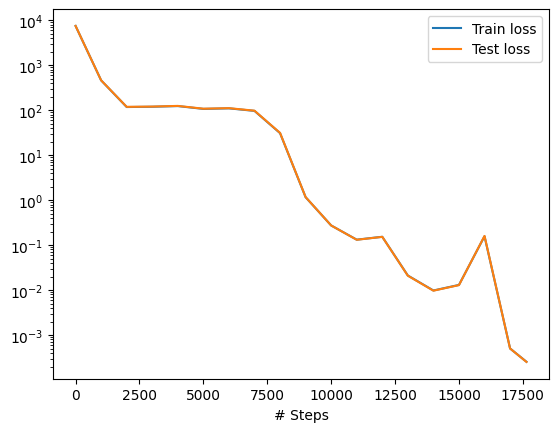

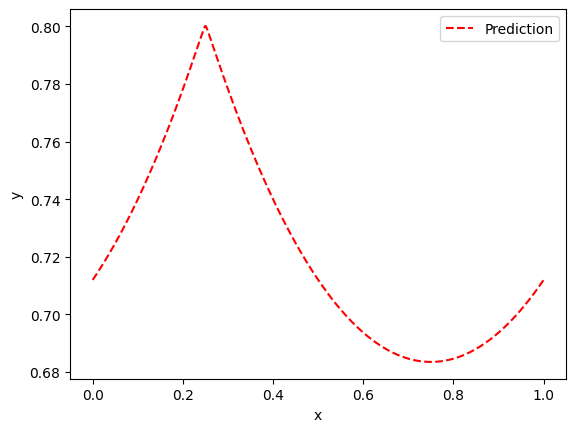

Au pt 0=  [[0.7119641]]
Au pt 1=  [[0.7119639]]


In [ ]:
import deepxde as dde
import numpy as np
from deepxde.backend import tf

eps=1e-3
def source(x):
    a=1/(eps*np.pi)
    b=1+((x-1/4)**2)*(eps**-2)
    return a/b

def pde(x, u):
    du_xx = dde.grad.hessian(u, x)
    return u - du_xx + u**4 - source(x)

def boundary_l(x, on_boundary):
    return on_boundary and np.isclose(x[0], 0)


def boundary_r(x, on_boundary):
    return on_boundary and np.isclose(x[0], 1)

geomtime = dde.geometry.Interval(0, 1)
bc_u_0 = dde.PeriodicBC(geomtime, 0, boundary_l, derivative_order=0, component=0)
bc_u_1 = dde.PeriodicBC(geomtime, 0, boundary_l, derivative_order=1, component=0)

data = dde.data.PDE(geomtime, pde, [bc_u_0,bc_u_1], 20000, 2, num_test=10000)

layer_size = [1] + [50] * 7 + [1]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN(layer_size, activation, initializer)

##################### Hard BCs
def feature_transform(inputs):
    # Periodic BC in x
    P = 1
    w = 2 * np.pi / P
    t = w*inputs[:,:1]
    return tf.concat(
        (
            tf.math.cos(t),
            tf.math.sin(t),
            tf.math.cos(2 * t),
            tf.math.sin(2 * t),
            tf.math.cos(3 * t),
            tf.math.sin(3 * t),
            tf.math.cos(4 * t),
            #tf.math.sin(4 * t),
            #tf.math.cos(5 * t),
            #tf.math.sin(5 * t),
            #tf.math.cos(6 * t),
            #tf.math.sin(6 * t),
            # tf.math.cos(7 * x),
            # tf.math.sin(7 * x),
            # tf.math.cos(8 * x),
            # tf.math.sin(8 * x),
            # tf.math.cos(9 * x),
            # tf.math.sin(9 * x),
            # tf.math.cos(10 * x),
            # tf.math.sin(10 * x),
        ),
        axis=1,
    )



############################################################
net.apply_feature_transform(feature_transform)


model = dde.Model(data, net)
model.compile("adam", lr=1e-3, loss="MSE")
losshistory, train_state = model.train(epochs=16000)
model.compile("L-BFGS-B")

losshistory, train_state = model.train()

dde.saveplot(losshistory, train_state, issave=True, isplot=True)

X1 = np.array([[0]])
X2 = np.array([[1]])
Y1 = model.predict(X1)
Y2 = model.predict(X2)
print('Au pt 0= ',Y1)
print('Au pt 1= ',Y2)

Compiling model...
Building feed-forward neural network...
'build' took 0.156818 s



/usr/local/lib/python3.8/dist-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:114: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'compile' took 2.272727 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [1.27e+10, 1.80e-14, 9.09e-13]    [3.33e+03, 1.80e-14, 9.09e-13]    []  
1000      [1.25e+10, 2.27e-11, 3.35e-08]    [3.46e+08, 2.27e-11, 3.35e-08]    []  
2000      [1.27e+10, 1.57e-12, 1.10e-10]    [5.25e+06, 1.57e-12, 1.10e-10]    []  
3000      [2.50e+10, 3.64e-12, 7.54e-08]    [2.05e+12, 3.64e-12, 7.54e-08]    []  
4000      [1.33e+10, 3.64e-12, 4.90e-08]    [1.83e+12, 3.64e-12, 4.90e-08]    []  
5000      [1.30e+10, 0.00e+00, 5.59e-08]    [1.75e+12, 0.00e+00, 5.59e-08]    []  
6000      [1.29e+10, 2.27e-13, 1.89e-08]    [1.67e+12, 2.27e-13, 1.89e-08]    []  
7000      [1.28e+10, 2.27e-13, 1.68e-08]    [1.62e+12, 2.27e-13, 1.68e-08]    []  
8000      [1.28e+10, 2.05e-12, 8.38e-09]    [1.51e+12, 2.05e-12, 8.38e-09]    []  
9000      [1.28e+10, 9.09e-13, 7.04e-09]    [1.37e+12, 9.09e-13, 7.04e-09]    []  
10000   

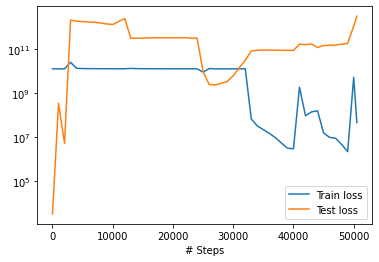

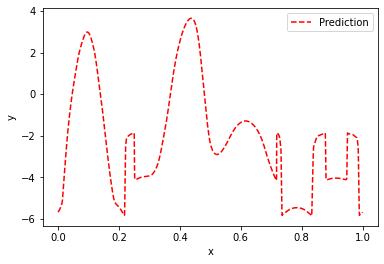

Au pt 0=  [[1.1552254]]
Au pt 1=  [[1.1552254]]


In [ ]:
import deepxde as dde
import numpy as np
from deepxde.backend import tf

eps=1e-7
def f(x,eps):
    return (1/np.pi)*eps/(eps**2+(x-1/4)**2)

def pde(x, u):
    du_xx = dde.grad.hessian(u, x)
    return u - du_xx + u**4 - f(x,eps)

def boundary_l(x, on_boundary):
    return on_boundary and np.isclose(x[0], 0)


def boundary_r(x, on_boundary):
    return on_boundary and np.isclose(x[0], 1)

geomtime = dde.geometry.Interval(0, 1)
bc_u_0 = dde.PeriodicBC(geomtime, 0, boundary_l, derivative_order=0, component=0)
bc_u_1 = dde.PeriodicBC(geomtime, 0, boundary_l, derivative_order=1, component=0)

data = dde.data.PDE(geomtime, pde, [bc_u_0,bc_u_1], 400, 400, num_test=10000)

layer_size = [1] + [100] * 7 + [1]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN(layer_size, activation, initializer)

##################### Hard BCs
def feature_transform(inputs):
    # Periodic BC in x
    P = 1
    w = 2 * np.pi / P
    t = w*inputs[:,:1]
    return tf.concat(
        (
            tf.math.cos(t),
            tf.math.sin(t),
            tf.math.cos(2 * t),
            tf.math.sin(2 * t),
            tf.math.cos(3 * t),
            tf.math.sin(3 * t),
            tf.math.cos(4 * t),
            #tf.math.sin(4 * t),
            #tf.math.cos(5 * t),
            #tf.math.sin(5 * t),
            #tf.math.cos(6 * t),
            #tf.math.sin(6 * t),
            # tf.math.cos(7 * x),
            # tf.math.sin(7 * x),
            # tf.math.cos(8 * x),
            # tf.math.sin(8 * x),
            # tf.math.cos(9 * x),
            # tf.math.sin(9 * x),
            # tf.math.cos(10 * x),
            # tf.math.sin(10 * x),
        ),
        axis=1,
    )



############################################################
net.apply_feature_transform(feature_transform)


model = dde.Model(data, net)
model.compile("adam", lr=1e-3, loss="MSE")
losshistory, train_state = model.train(epochs=50000)
batch_size_ = 50
model.compile("L-BFGS-B")
dde.optimizers.set_LBFGS_options(
    maxcor=50,
)
losshistory, train_state = model.train(batch_size = batch_size_)

dde.saveplot(losshistory, train_state, issave=True, isplot=True)

X1 = np.array([[0]])
X2 = np.array([[1]])
Y1 = model.predict(X1)
Y2 = model.predict(X2)
print('Au pt 0= ',Y1)
print('Au pt 1= ',Y2)